In [66]:
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import numpy as np
import time

In [51]:
import yfinance

In [52]:
def download_stock_data(Stocks, start_date, end_date):
    want = ["Stock", "Open", "High", "Low", "Close", "Adj Close", "Volume"]
    stocks = pd.DataFrame(columns = want)
    for i in Stocks:  
        print("Downloading:", i)
        stock = yfinance.download(i, start = "2020-01-01",end = "2022-12-31")
        stock = stock.reset_index()
        stock["googl"] = i
        stocks = pd.concat([stocks, stock])  
    want = ["Stock", "Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]
    stocks = stocks[want] 
    return stocks

In [54]:
start_date = pd.to_datetime("2020-01-1") 
end_date = pd.to_datetime("2021-12-31") 
Stocks = ["AAPL"] 
data = download_stock_data(Stocks, start_date, end_date)
display(data)

Downloading: AAPL
[*********************100%***********************]  1 of 1 completed


,Stock,Date,Open,High,Low,Close,Adj Close,Volume
0,NaN,2019-12-31,72.482498,73.419998,72.379997,73.412498,72.337990,100805600
1,NaN,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.988464,135480400
2,NaN,2020-01-03,74.287498,75.144997,74.125000,74.357498,73.269157,146322800
3,NaN,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.852974,118387200
4,NaN,2020-01-07,74.959999,75.224998,74.370003,74.597504,73.505653,108872000
...,...,...,...,...,...,...,...,...
522,NaN,2022-01-26,163.500000,164.389999,157.820007,159.690002,159.690002,108275300
523,NaN,2022-01-27,162.449997,163.839996,158.279999,159.220001,159.220001,121954600
524,NaN,2022-01-28,165.710007,170.350006,162.800003,170.330002,170.330002,179935700
525,NaN,2022-01-31,170.160004,175.000000,169.509995,174.779999,174.779999,115541600


In [55]:
data.tail()

,Stock,Date,Open,High,Low,Close,Adj Close,Volume
522,NaN,2022-01-26,163.500000,164.389999,157.820007,159.690002,159.690002,108275300
523,NaN,2022-01-27,162.449997,163.839996,158.279999,159.220001,159.220001,121954600
524,NaN,2022-01-28,165.710007,170.350006,162.800003,170.330002,170.330002,179935700
525,NaN,2022-01-31,170.160004,175.000000,169.509995,174.779999,174.779999,115541600
526,NaN,2022-02-01,174.009995,174.820007,172.320007,174.610001,174.610001,79067749


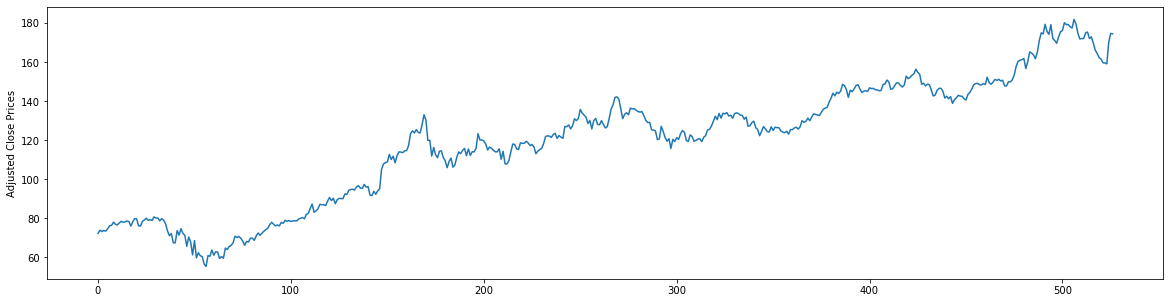

In [56]:
data['Adj Close'].plot()
plt.ylabel("Adjusted Close Prices")
plt.show()

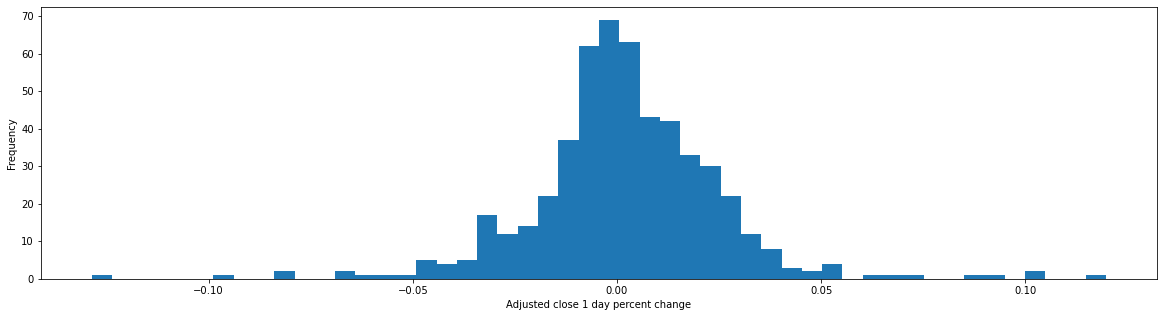

In [57]:
data['Adj Close'].pct_change().plot.hist(bins=50)
plt.xlabel("Adjusted close 1 day percent change")
plt.show()

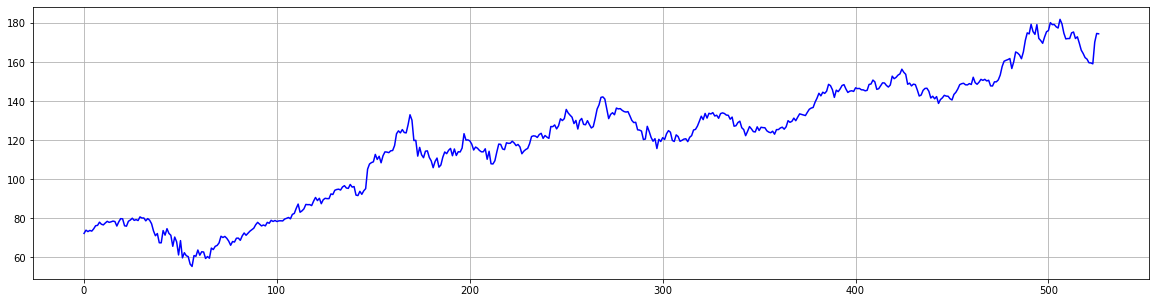

In [58]:
y = data['Adj Close']
X= np.arange(0,len(y))
X = np.array(X)
y = np.array(y) 
y_int=y

plt.plot(X,y,'b')
plt.grid(True)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
y=y.reshape(-1, 1)
y = scaler.fit_transform(y)

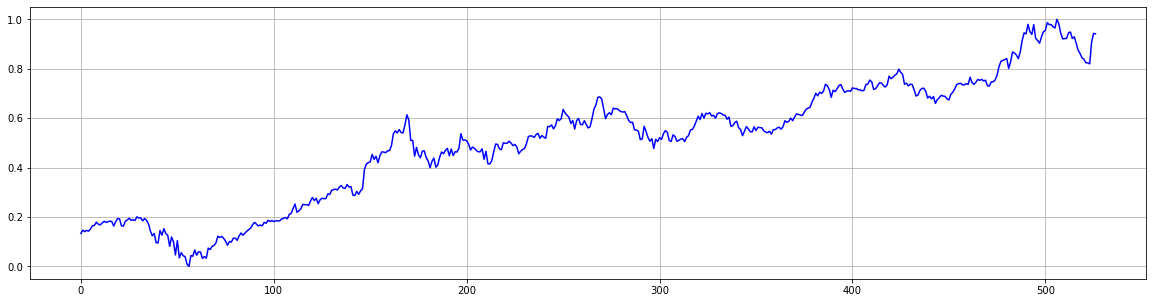

In [59]:
plt.plot(X,y,'b')
plt.grid(True)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


X_train = np.array(X_train[:,np.newaxis])
X_test = np.array(X_test[:,np.newaxis])

timestamp = 1

X_train = X_train.reshape(X_train.shape[0] ,timestamp, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0] ,timestamp, X_test.shape[1])


y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(353, 1, 1)
(174, 1, 1)
(353, 1)
(174, 1)


In [67]:
model = Sequential()
model.add(LSTM(
    input_shape=(1,1),
    units=512,
    return_sequences=True))

model.add(Dropout(0.4))

model.add(LSTM(
    units=256,
    return_sequences=True))

model.add(Dropout(0.4))

model.add(LSTM(
    units=128,
    return_sequences=False))

model.add(Dropout(0.4))

model.add(Dense(128,kernel_initializer='uniform',activation='relu'))        
model.add(Dense(64,kernel_initializer='uniform',activation='relu'))        
model.add(Dense(1))

print(model.summary())


model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
start = time.time()
print ('compilation time : ', time.time() - start)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 1, 512)            1052672   
                                                                 
 dropout_12 (Dropout)        (None, 1, 512)            0         
                                                                 
 lstm_13 (LSTM)              (None, 1, 256)            787456    
                                                                 
 dropout_13 (Dropout)        (None, 1, 256)            0         
                                                                 
 lstm_14 (LSTM)              (None, 128)               197120    
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 128)              

In [68]:
model.compile(loss='mean_squared_error', optimizer='adam' , metrics = ['mean_squared_error'])

model.fit(
    X_train,
    y_train,
    batch_size=512,
    epochs=100,
    validation_split=0.05)

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 0.3230 - mean_squared_error: 0.3230 - val_loss: 0.2135 - val_mean_squared_error: 0.2135
Epoch 2/100
1/1 [==============================] - 0s 63ms/step - loss: 0.3016 - mean_squared_error: 0.3016 - val_loss: 0.1895 - val_mean_squared_error: 0.1895
Epoch 3/100
1/1 [==============================] - 0s 62ms/step - loss: 0.2718 - mean_squared_error: 0.2718 - val_loss: 0.1563 - val_mean_squared_error: 0.1563
Epoch 4/100
1/1 [==============================] - 0s 60ms/step - loss: 0.2302 - mean_squared_error: 0.2302 - val_loss: 0.1128 - val_mean_squared_error: 0.1128
Epoch 5/100
1/1 [==============================] - 0s 61ms/step - loss: 0.1745 - mean_squared_error: 0.1745 - val_loss: 0.0653 - val_mean_squared_error: 0.0653
Epoch 6/100
1/1 [==============================] - 0s 62ms/step - loss: 0.1112 - mean_squared_error: 0.1112 - val_loss: 0.0395 - val_mean_squared_error: 0.0395
Epoch 7/100
1/1 [=========================

Epoch 52/100
1/1 [==============================] - 0s 59ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 53/100
1/1 [==============================] - 0s 60ms/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 54/100
1/1 [==============================] - 0s 56ms/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 55/100
1/1 [==============================] - 0s 57ms/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 56/100
1/1 [==============================] - 0s 59ms/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 57/100
1/1 [==============================] - 0s 57ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 58/100
1/1 [================

In [69]:
import math
def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))
    testScore = model.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]

model_score(model, X_train, y_train, X_test, y_test)

Train Score: 0.00491 MSE (0.07 RMSE)
Test Score: 0.00484 MSE (0.07 RMSE)


(0.004914435558021069, 0.004841306246817112)

In [70]:
p = model.predict(X_test)
p = p.reshape(p.shape[0],1)

y_test = y_test.reshape(y_test.shape[0],1)

y_test = scaler.inverse_transform(y_test)
p = scaler.inverse_transform(p)

print(p.shape)

(174, 1)


Red - Predicted Stock Price of Apple  ,  Blue - Actual Stock Price of Apple


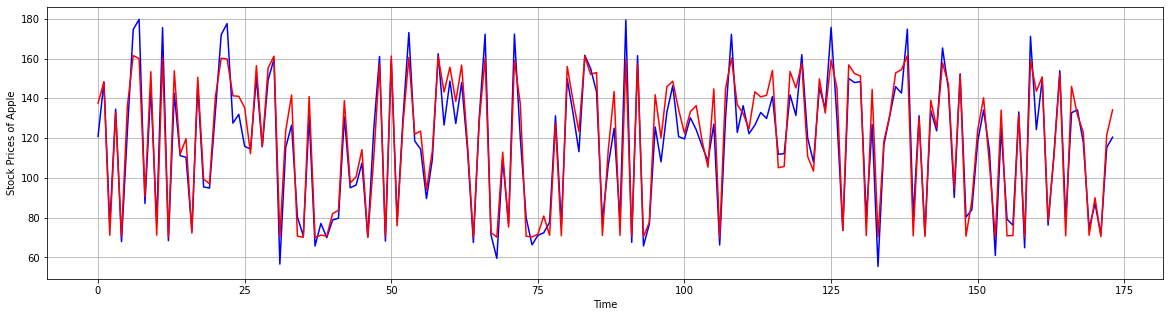

In [71]:
print("Red - Predicted Stock Price of Apple  ,  Blue - Actual Stock Price of Apple")
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(y_test , 'b-')
plt.plot(p , 'red')
plt.xlabel('Time')
plt.ylabel('Stock Prices of Apple')
plt.grid(True)
plt.show()

In [86]:
import pandas as pd

hist = pd.DataFrame(y_int,columns=['Close'])
hist['Close']

hist['Date']=data['Date']

def prev_closing(values):
    return values[0]

hist['Close_1D'] = hist['Close'].shift(1)
hist['Close_3D'] = hist['Close'].shift(3)
hist['Close_12D'] = hist['Close'].shift(12)
hist.head(5)

,Close,Date,Close_1D,Close_3D,Close_12D
0,72.337990,2019-12-31,NaN,NaN,NaN
1,73.988464,2020-01-02,72.337990,NaN,NaN
2,73.269157,2020-01-03,73.988464,NaN,NaN
3,73.852974,2020-01-06,73.269157,72.337990,NaN
4,73.505653,2020-01-07,73.852974,73.988464,NaN


<AxesSubplot:xlabel='Date'>

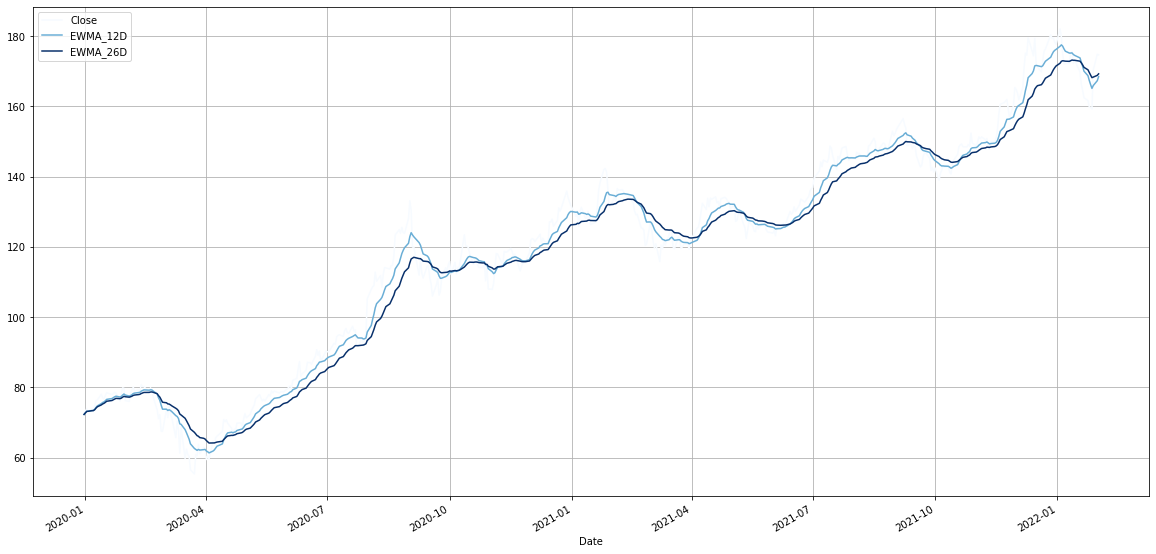

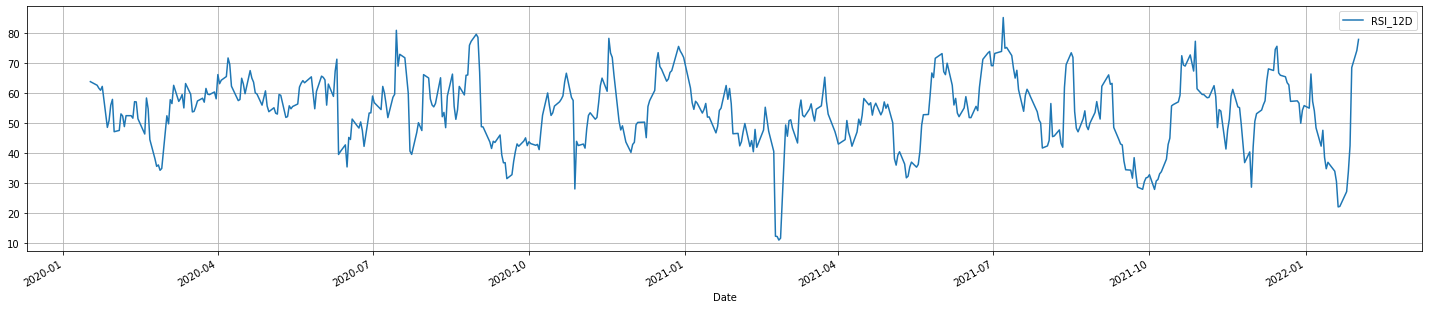

In [87]:
hist["Momentum_1D"] = hist["Close"] - hist["Close_1D"]
hist["Momentum_3D"] = hist["Close"] - hist["Close_3D"]

#ROC

hist["ROC_3D"] = ( hist["Close"] - hist["Close_3D"] ) / hist["Close_3D"] * 100
hist["ROC_12D"] = ( hist["Close"] - hist["Close_12D"] ) / hist["Close_12D"] * 100

#Relative Strength Index

def rsi(values):
    dUp = values[values>0].mean()
    dDown = -1*values[values<0].mean()
    return 100 * dUp / (dUp + dDown)
hist['RSI_6D'] = hist['Momentum_1D'].rolling(center=False,window=6).apply(rsi)
hist['RSI_12D'] = hist['Momentum_1D'].rolling(center=False,window=12).apply(rsi)

# Simple Moving Average

hist['SMA_5D'] = hist['Close'].rolling(center=False,window=5).mean()
hist['SMA_10D'] = hist['Close'].rolling(center=False,window=10).mean()
hist['SMA_20D'] = hist['Close'].rolling(center=False,window=20).mean()
hist['SMA_30D'] = hist['Close'].rolling(center=False,window=30).mean()
hist['SMA_50D'] = hist['Close'].rolling(center=False,window=50).mean()

#EWMA 
hist['EWMA_12D'] = hist['Close'].ewm(span=12).mean()
hist['EWMA_26D'] = hist['Close'].ewm(span=26).mean()

#MACD 
hist['MACD'] = hist['EWMA_12D'] - hist['EWMA_26D']

cm = plt.cm.get_cmap('Blues')

hist.plot(x= 'Date',y=['Close','EWMA_12D','EWMA_26D'],figsize=(20,10),grid=True,colormap=cm)
hist.plot(x= 'Date',y=['RSI_12D',],figsize=(25,5),grid=True)

array([[<AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Momentum_1D'}>,
        <AxesSubplot:title={'center':'Momentum_3D'}>],
       [<AxesSubplot:title={'center':'ROC_3D'}>,
        <AxesSubplot:title={'center':'ROC_12D'}>,
        <AxesSubplot:title={'center':'RSI_6D'}>],
       [<AxesSubplot:title={'center':'RSI_12D'}>,
        <AxesSubplot:title={'center':'SMA_5D'}>,
        <AxesSubplot:title={'center':'SMA_10D'}>],
       [<AxesSubplot:title={'center':'SMA_20D'}>,
        <AxesSubplot:title={'center':'SMA_30D'}>, <AxesSubplot:>]],
      dtype=object)

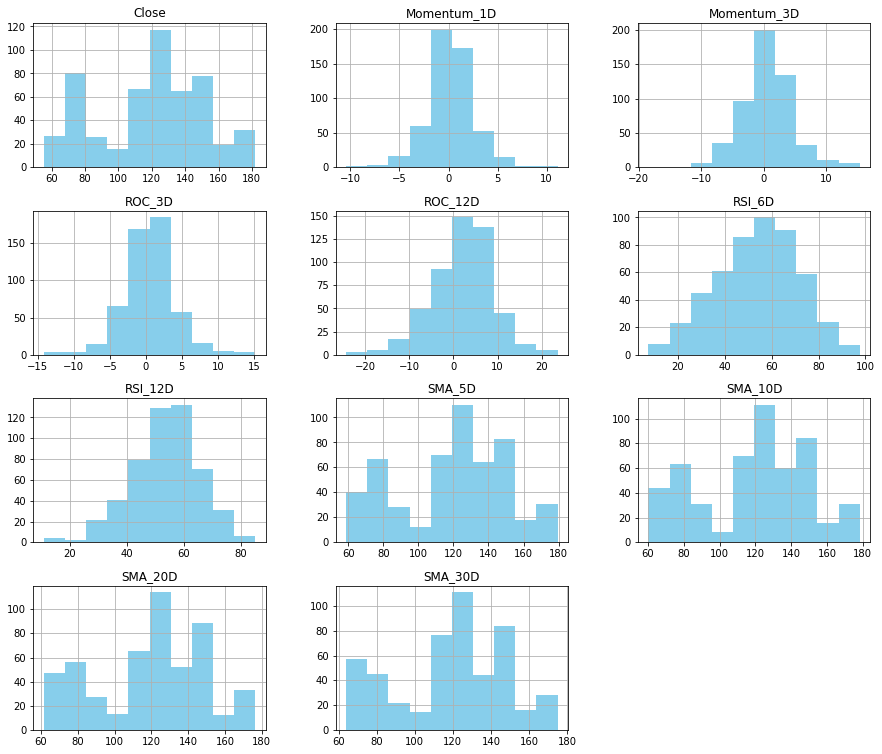

In [89]:
hist[["Close","Momentum_1D","Momentum_3D","ROC_3D","ROC_12D","RSI_6D","RSI_12D","SMA_5D","SMA_10D","SMA_20D","SMA_30D"]].hist(figsize=(15,13),color='skyblue')

<AxesSubplot:>

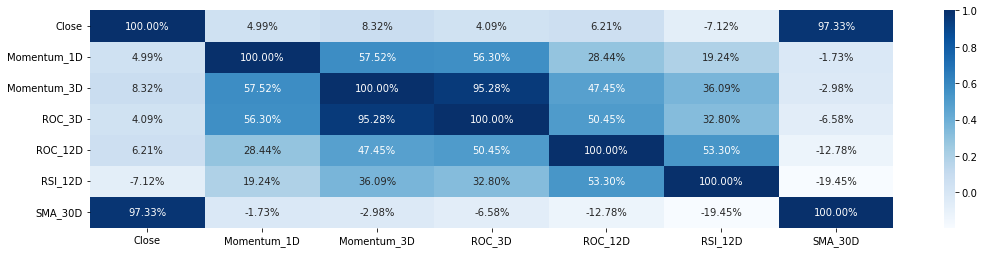

In [90]:
import seaborn as sns
names = ["Close","Momentum_1D","Momentum_3D","ROC_3D","ROC_12D","RSI_12D","SMA_30D"]
corr = hist[names].corr()
fig = plt.figure(figsize=(18,4))
ax = fig.add_subplot(111)

sns.heatmap(corr,cmap=plt.cm.Blues, annot=True, fmt=".2%", ax=ax)